In [3]:
import numpy as np
import pandas as pd
import seaborn as sns


In [17]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [7]:
# 1. Data Quality Check
# Check for missing values
missing_values = df.isnull().sum()

In [9]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

In [11]:
# 2. Statistical Summary
stat_summary = df.describe()

In [13]:
# 3. Outlier Detection using IQR method for the 'Amount' feature
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

In [15]:
# Count of outliers
num_outliers = outliers.shape[0]

In [55]:
# 4. Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Class', ylabel='count'>

Text(0.5, 1.0, 'Class Distribution')

Text(0.5, 0, 'Class (0: Non-Fraud, 1: Fraud)')

Text(0, 0.5, 'Number of Transactions')

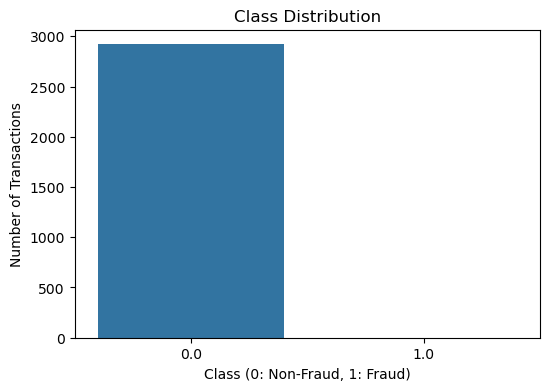

In [23]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Amount'>

Text(0.5, 1.0, 'Boxplot of Transaction Amount')

Text(0.5, 0, 'Transaction Amount')

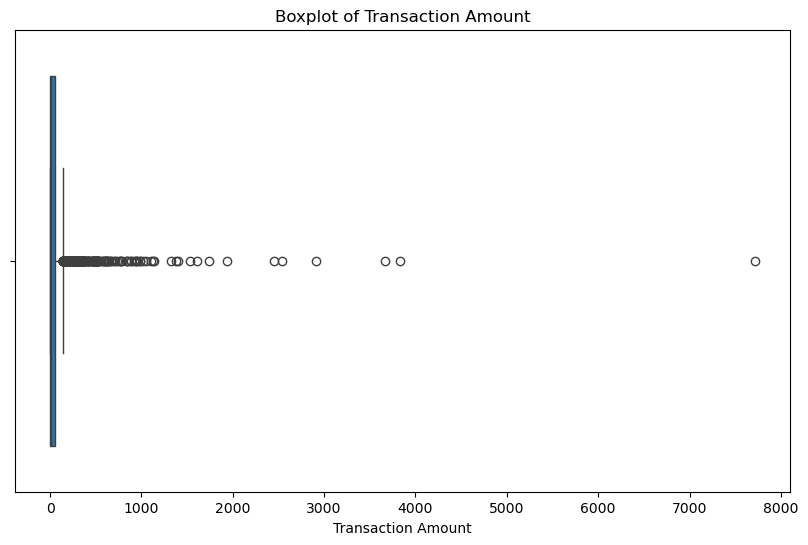

In [25]:
# Boxplot for 'Amount' to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

<Figure size 1500x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

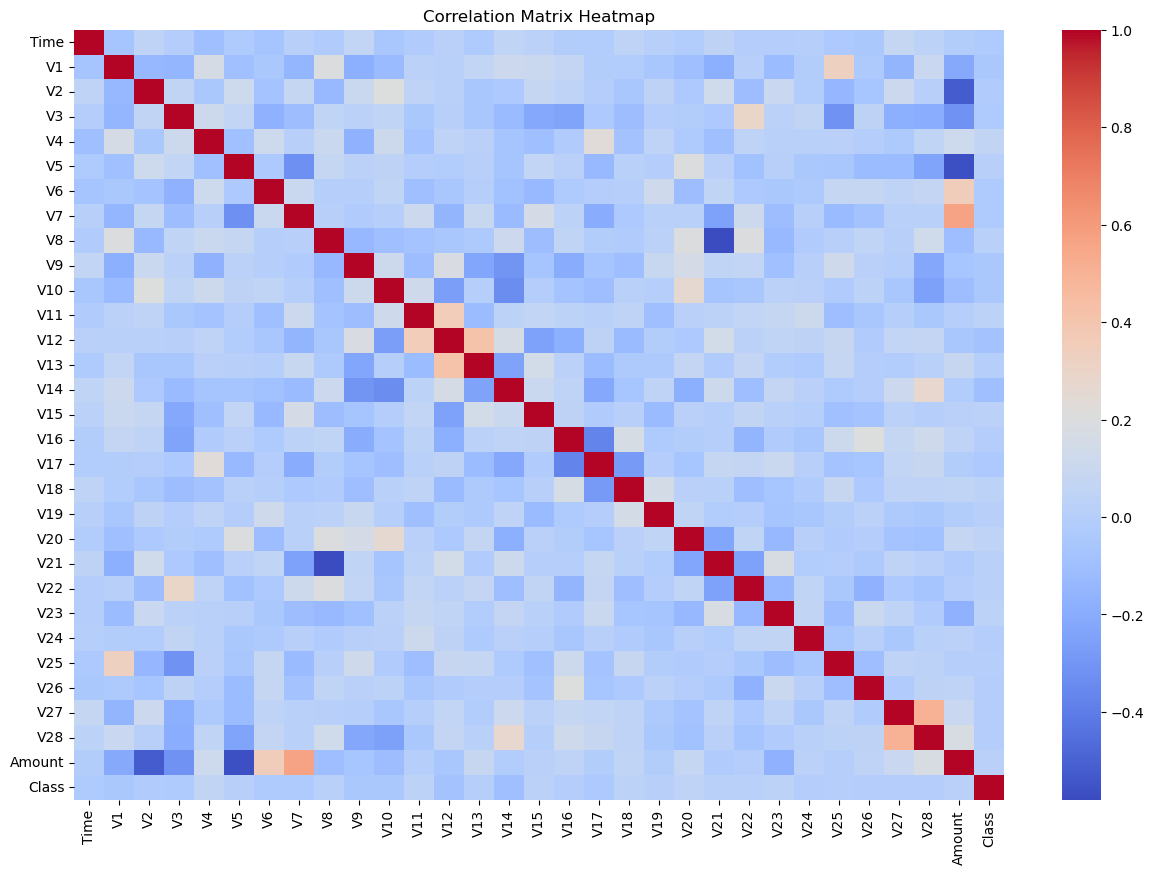

In [27]:
# Heatmap for correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
# Print results of the data quality check and statistical summary
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)
print("\nData Types:\n", data_types)
print("\nStatistical Summary:\n", stat_summary)
print("\nNumber of Outliers in 'Amount':", num_outliers)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    1
Class     1
dtype: int64

Duplicate Rows: 24


NameError: name 'data_types' is not defined

In [47]:
# Detect outliers using IQR for the 'Amount' feature
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [49]:
# Identify outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

In [51]:
# Undersampling the majority class
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]


In [53]:
# Undersample the majority class
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Check the distribution of the target variable
balanced_class_distribution = df_balanced['Class'].value_counts()
print(balanced_class_distribution)

Class
0.0    2
1.0    2
Name: count, dtype: int64


In [57]:
# Feature Engineering
# Extract hour from 'Time' feature
df['Hour'] = (df['Time'] / 3600) % 24

In [59]:
# Scale 'Amount' using StandardScaler
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

In [61]:
# Select relevant features for modeling
features = [col for col in df.columns if col not in ['Time', 'Amount', 'Class']]
X = df[features]
y = df['Class']

In [73]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Feature Engineering: Extract relevant features
df['Hour'] = (df['Time'] / 3600) % 24

# Standardize the 'Amount' feature
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# Define feature set (X) and target variable (y)
features = [col for col in df.columns if col not in ['Time', 'Amount', 'Class']]
X = df[features]
y = df['Class']

# Ensure X and y have no missing values
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    print("Missing values detected. Please handle them before proceeding.")
else:
    print("No missing values detected.")

# Ensure X and y have matching lengths
if len(X) != len(y):
    print("Mismatch in the length of X and y. Please check your data.")
else:
    print(f"Length of X: {len(X)}, Length of y: {len(y)}")

# Check data type of y and convert if necessary
if not isinstance(y, pd.Series):
    y = pd.Series(y)
    
# Check the unique values in y
print("Unique values in y:", y.unique())

# Now, perform the train/test split with stratification
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print("Train/test split successful.")
except Exception as e:
    print(f"Error during train/test split: {e}")


Missing values detected. Please handle them before proceeding.
Length of X: 2923, Length of y: 2923
Unique values in y: [ 0.  1. nan]
Error during train/test split: Input y contains NaN.


NameError: name 'X_train' is not defined

NameError: name 'missing_values_count' is not defined

In [77]:
# Check for missing values in y
missing_values_count = y.isnull().sum()
print(f"Number of missing values in y: {missing_values_count}")

# Investigate missing values (e.g., check distribution, patterns)
if missing_values_count > 0:
    missing_indices = y[y.isnull()].index
    print(f"Missing value indices: {missing_indices}")
    print(df.loc[missing_indices])  # Check other columns for patterns or issues

Number of missing values in y: 1
Missing value indices: Index([2922], dtype='int64')
      Time        V1      V2        V3        V4        V5        V6       V7  \
2922  2471  0.980827 -0.5481 -0.376505  0.090482 -0.315812 -0.765952  0.45015   

            V8        V9  ...       V23       V24       V25       V26  V27  \
2922 -0.328645  0.267872  ... -0.322785 -0.023361  0.560064  1.133775 -0.1   

      V28  Amount  Class      Hour  Amount_Scaled  
2922  NaN     NaN    NaN  0.686389            NaN  

[1 rows x 33 columns]


In [79]:
# Remove rows with missing target values
if missing_values_count > 0:
    df = df.dropna(subset=['Class'])
    X = df[features]
    y = df['Class']
    print(f"Number of missing values in y after removal: {y.isnull().sum()}")

# Perform the train/test split with stratification
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print("Train/test split successful.")
except Exception as e:
    print(f"Error during train/test split: {e}")

Number of missing values in y after removal: 0
Train/test split successful.


In [81]:
# Train/Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [83]:
# Model Training - Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [85]:
# Predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

In [87]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       876
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       877
   macro avg       0.50      0.50      0.50       877
weighted avg       1.00      1.00      1.00       877

Confusion Matrix:
 [[876   0]
 [  1   0]]


C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [89]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9691780821917808


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

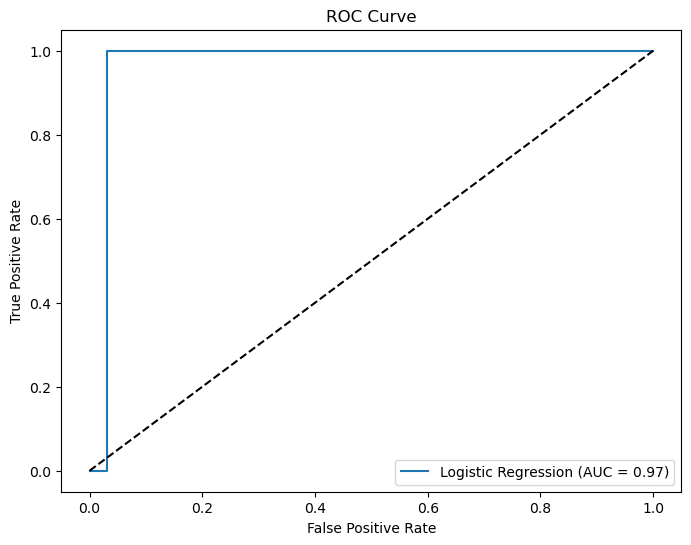

In [91]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [95]:
pip install xgboost scikit-learn


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.1/124.9 MB 416.7 kB/s eta 0:05:00
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.2/124.9 MB 737.3 kB/s eta 0:02:50
   ---------------------------------------- 0.2/124.9 MB 737.3 kB/s eta 0:02:50
   ---------------------------------------- 0.3/124.9 MB 803.7 kB/s eta 0:02:36
   ---------------------------------------- 0.4/124.9 MB 882.8 kB/s eta 0:02:22
   ---------------------------------------- 0.4/124.9 MB 882.8 kB/s eta 0:02:22
   ---------------------------------------- 0.5/124.9 MB 952.1 kB/s eta 0:02:11
   ---------------------------------------- 0.5/124.9 MB 952.1 kB/s

In [97]:
from xgboost import XGBClassifier

In [99]:
# Model Training - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [101]:
# Predictions
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


In [103]:
# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       876
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       877
   macro avg       0.50      0.50      0.50       877
weighted avg       1.00      1.00      1.00       877

Random Forest Confusion Matrix:
 [[876   0]
 [  1   0]]


C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [105]:
# ROC-AUC Score
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)
print("Random Forest ROC-AUC Score:", rf_roc_auc)



Random Forest ROC-AUC Score: 0.4971461187214612


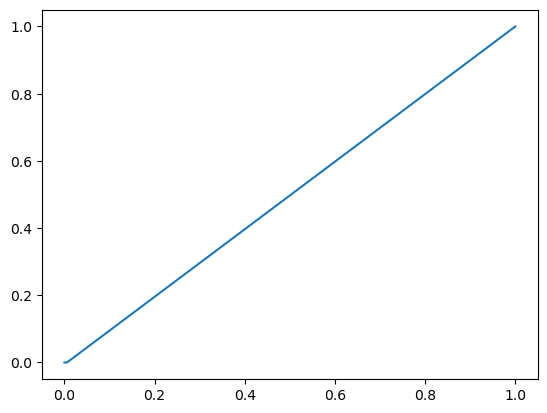

In [107]:

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')


In [115]:
# Model Training - XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train,y_train )


C:\Users\praro\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [117]:
# Predictions
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]


In [119]:
# Evaluation
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))


XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       876
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       877
   macro avg       0.50      0.50      0.50       877
weighted avg       1.00      1.00      1.00       877

XGBoost Confusion Matrix:
 [[876   0]
 [  1   0]]


C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [121]:
# ROC-AUC Score
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred_proba)
print("XGBoost ROC-AUC Score:", xgb_roc_auc)


XGBoost ROC-AUC Score: 0.6215753424657535


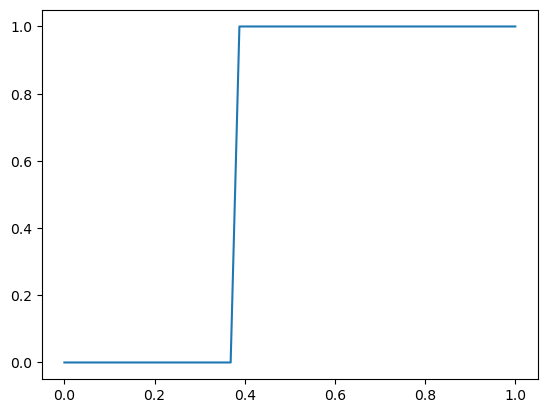

In [123]:
# Plot ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_y_pred_proba)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve Comparison')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


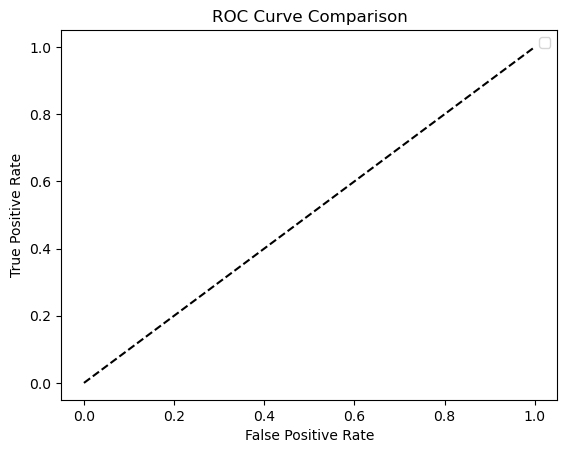

In [127]:
# Plot ROC Curve for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [129]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


In [131]:
# Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf,
                              scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best ROC-AUC score: ", grid_search_rf.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\praro\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC-AUC score:  nan


In [133]:
# Re-evaluate the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)
y_pred_rf_best_proba = best_rf_model.predict_proba(X_test)[:, 1]


In [137]:
# Evaluate performance
print("Best Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_best))
print("Best Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))
print("Best Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_best_proba))


Best Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       876
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       877
   macro avg       0.50      0.50      0.50       877
weighted avg       1.00      1.00      1.00       877

Best Random Forest Confusion Matrix:
 [[876   0]
 [  1   0]]
Best Random Forest ROC-AUC Score: 0.4971461187214612


C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\praro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [139]:
import joblib

In [141]:
joblib.dump(best_rf_model, 'credit_card_fraud_detection_rf_model.pkl')

['credit_card_fraud_detection_rf_model.pkl']

In [143]:
from flask import Flask, request, jsonify
import joblib


In [145]:
app = Flask(__name__)

In [147]:
# Load the saved model
model = joblib.load('credit_card_fraud_detection_rf_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get JSON data


In [149]:
    # Assume data is in the form of a dict with keys corresponding to features
    prediction = model.predict([list(data.values())])
    return jsonify({'fraud_prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


IndentationError: expected an indented block after 'if' statement on line 5 (2979590940.py, line 6)

In [1]:
!pip install sagemaker

In [15]:
!pip install boto3
import boto3




In [3]:
import sagemaker
import boto3

# Initialize SageMaker session
sagemaker_session = sagemaker.Session()

# Get the default S3 bucket
bucket = sagemaker_session.default_bucket()

# Define the S3 path where the model will be uploaded
prefix = 'fraud_detection'
s3_model_path = f"s3://{bucket}/{prefix}/model.tar.gz"

# Upload the model to S3
boto3.Session().resource('s3').Bucket(bucket).upload_file('fraud_detection.tar.gz', f'{prefix}/fraud_detection.tar.gz')

print(f"Model uploaded to {s3_model_path}")


sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\praro\AppData\Local\sagemaker\sagemaker\config.yaml


ValueError: Must setup local AWS configuration with a region supported by SageMaker.